In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import load_boston
df=load_boston()
print(df)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [45]:
x=df.data
y=df.target
print(x.shape)
print(y.shape)
y=list(y)

(506, 13)
(506,)


In [46]:
import pandas as pd
frame=pd.DataFrame(x,columns=df.feature_names)
frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
import numpy as np
for i in df.feature_names:
    mean=frame[i].mean()
    std=frame[i].std()
    frame[i]=(frame[i]-mean)/std
templ=[]
for i in range(506):
    templ.append(1)
frame.insert(0,"X0",templ,True)
frame.insert(14,"Y",y,True)
frame.head()

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,1,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,1,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,1,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,1,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [48]:
x=frame.values
x.shape

(506, 15)

In [56]:
x.shape[1]

15

In [65]:

def hypothesis(x,theta):
    return np.dot(x,theta)
def error(x,y,theta):
    m=x.shape[0]
    ycap=hypothesis(x,theta)
    e=np.sum((y-ycap)**2)
    return e/m
def calculategradient(x,y,theta):
    ycap=hypothesis(x,theta)
    grad=np.dot(x.T,(ycap-y))
    m=x.shape[0]
    return grad/m
def gradientDescent(data,max_steps=10,learning_rate=0.01,batch_size=20):
    n=data.shape[1]-1
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_steps):
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        for j in range(total_batches):
            batch=data[i*batch_size:(i+1)*batch_size,:]
            x=batch[:,:-1]
            y=batch[:,-1]
            grad=calculategradient(x,y,theta)
            theta-=learning_rate*grad
            e=error(x,y,theta)
            error_list.append(e)
    return theta,error_list



In [66]:
theta,error_list=gradientDescent(x)
print(theta,error_list)

[19.77919276 -0.43585468 -0.23180242  0.11039145  0.62276333 -0.83433281
  3.9264422  -0.43545814 -2.01506005  0.21005427 -1.11760882 -2.03348923
  0.65955485 -3.24430447] [779.2126379188755, 738.6902850295105, 701.5582558847203, 667.4220508470447, 635.9458741662595, 606.8424893465522, 579.8649616294439, 554.7999251290825, 531.4620826983248, 509.68970334402877, 489.34092765433206, 470.29072842449034, 452.4284032193965, 435.65549939543763, 419.8840912514688, 405.0353443963621, 391.0383148387708, 377.82894031017435, 365.3491893967066, 353.54634055796197, 342.37236835687594, 331.7834184590854, 321.7393563800717, 312.2033777224466, 303.14166988151453, 307.4297032085302, 300.6382287695508, 294.13766505916766, 287.8994065373134, 281.89884855853563, 276.11478625427856, 270.5289048415133, 265.1253474224037, 259.8903484645757, 254.81192295242008, 249.87960272608998, 245.08421281835552, 240.41768169571952, 235.87288023927994, 231.44348508822418, 227.12386263617154, 222.90897053614952, 218.794274

In [67]:
theta

array([19.77919276, -0.43585468, -0.23180242,  0.11039145,  0.62276333,
       -0.83433281,  3.9264422 , -0.43545814, -2.01506005,  0.21005427,
       -1.11760882, -2.03348923,  0.65955485, -3.24430447])

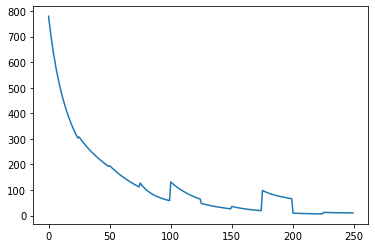

In [68]:
plt.plot(error_list)

In [69]:
error_list[-1]

10.282147332474768

In [70]:
templist=frame.values
ycap=(hypothesis(templist[:,:-1],theta))

y=np.array(y)
def r2score(y,ycap):
    num=np.sum((y-ycap)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score*100

r2score(y,ycap)

61.91992529108161